In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob 
import os 

In [30]:

# merging the files 
joined_pi_files = os.path.join("../out/out_pi_full_*.csv") 

joined_dim_files = os.path.join("../out/out_dim_full_*.csv")
  
# A list of all joined files is returned 
joined_pi_list = glob.glob(joined_pi_files) 
joined_dim_list = glob.glob(joined_dim_files)

  
# Finally, the files are joined 
df_pi = pd.concat(map(pd.read_csv, joined_pi_list), ignore_index=True) 
df_dim = pd.concat(map(pd.read_csv, joined_dim_list), ignore_index=True)

df_pi = df_pi.drop(columns=['Trial'])
df_dim = df_dim.drop(columns=['Trial'])

df_pi_model = df_pi.groupby(['Model'])
df_dim_model = df_dim.groupby(['Model'])

# shorten Long names with abreveations LSOA
df_pi['Model'] = df_pi['Model'].replace('LossScaleOptimizer(Adam)', 'LSOA')
df_dim['Model'] = df_dim['Model'].replace('LossScaleOptimizer(Adam)', 'LSOA')

df_pi_metrics = df_pi.groupby('Model').agg(['mean', 'std', 'min', 'max'])[['Train', 'Test']]
df_dim_metrics = df_dim.groupby('Model').agg(['mean', 'std', 'min', 'max'])[['Train', 'Test']]





Dimensionless


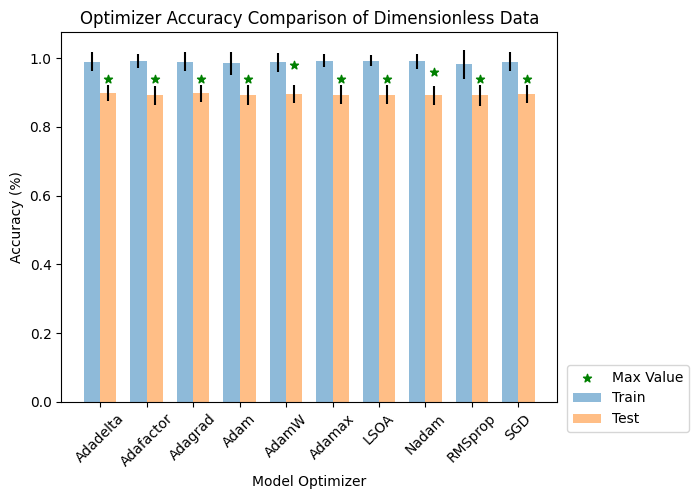

In [75]:
# Set the x-axis labels as the models
x_labels = df_pi_metrics.index
# print(x_labels)
# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
x_train = np.arange(len(x_labels))
x_test = x_train + bar_width

# Set the y-axis values as the mean train scores
y_train = df_pi_metrics[('Train', 'mean')]

# Set the y-axis values as the mean test scores
y_test = df_pi_metrics[('Test', 'mean')]

# Set the y-axis error values as the standard deviation of train scores
y_train_error = df_pi_metrics[('Train', 'std')]

# Set the y-axis error values as the standard deviation of test scores
y_test_error = df_pi_metrics[('Test', 'std')]

# Set the title and labels
plt.title('Optimizer Accuracy Comparison of Dimensionless Data')
plt.xlabel('Model Optimizer')
plt.ylabel('Accuracy (%)')
plt.xticks(x_train + bar_width / 2, x_labels, rotation=45)
# Plot the train scores as bars with error bars
plt.bar(x_train, y_train, width=bar_width, alpha=0.5, label='Train')
plt.errorbar(x_train, y_train, yerr=y_train_error, fmt='none', color='black')

# Plot the test scores as bars with error bars
plt.bar(x_test, y_test, width=bar_width, alpha=0.5, label='Test')
plt.errorbar(x_test, y_test, yerr=y_test_error, fmt='none', color='black')
# Find the maximum value
max_value = df_pi_metrics[('Test', 'max')]
# print(max_value)
# Round the maximum value and convert it to an integer
# Round the maximum value and convert it to an integer
rounded_max_value = max_value.values.round(2)

# print(rounded_max_value)
plt.scatter(x_test, rounded_max_value, color='green', marker='*', label='Max Value')
plt.legend(bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)

plt.show()


Dimensioned


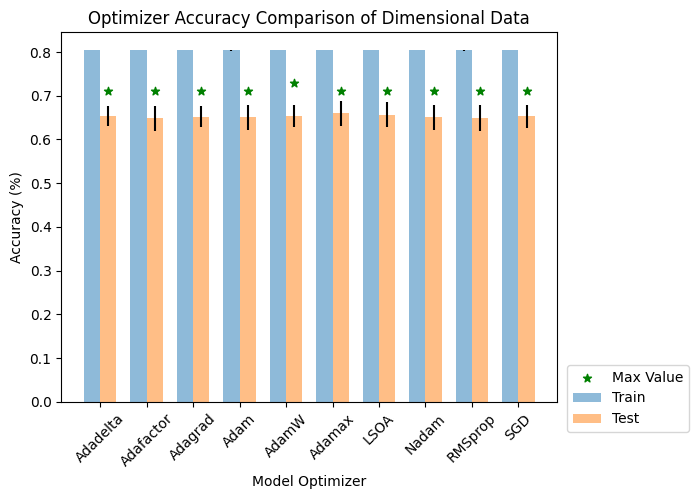

In [77]:
# Set the x-axis labels as the models
x_labels = df_dim_metrics.index
# print(x_labels)
# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
xdim_train = np.arange(len(x_labels))
xdim_test = xdim_train + bar_width

# Set the y-axis values as the mean train scores
ydim_train = df_dim_metrics[('Train', 'mean')]

# Set the y-axis values as the mean test scores
ydim_test = df_dim_metrics[('Test', 'mean')]

# Set the y-axis error values as the standard deviation of train scores
ydim_train_error = df_dim_metrics[('Train', 'std')]

# Set the y-axis error values as the standard deviation of test scores
ydim_test_error = df_dim_metrics[('Test', 'std')]

# Set the title and labels
plt.title('Optimizer Accuracy Comparison of Dimensional Data')
plt.xlabel('Model Optimizer')
plt.ylabel('Accuracy (%)')
plt.xticks(xdim_train + bar_width / 2, x_labels, rotation=45)
# Plot the train scores as bars with error bars
plt.bar(xdim_train, ydim_train, width=bar_width, alpha=0.5, label='Train')
plt.errorbar(xdim_train, ydim_train, yerr=ydim_train_error, fmt='none', color='black')

# Plot the test scores as bars with error bars
plt.bar(xdim_test, ydim_test, width=bar_width, alpha=0.5, label='Test')
plt.errorbar(xdim_test, ydim_test, yerr=y_test_error, fmt='none', color='black')
# Find the maximum value
max_value_dim = df_dim_metrics[('Test', 'max')]
# print(max_value)
# Round the maximum value and convert it to an integer
# Round the maximum value and convert it to an integer
rounded_dim_max_value = max_value_dim.values.round(2)

# print(rounded_max_value)
plt.scatter(x_test, rounded_dim_max_value, color='green', marker='*', label='Max Value')
plt.legend(bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)

plt.show()
